# Dynamics of scalar-modulated system

Dynamics equation:

$\dot{x}(x, t) = a(t)b(x) + c(x); \;\; x(0) = 0$

Goal: stabilize arbitrary increasing trajectory $x^*(t); \;  x^*(0) = 0$.

## Sufficient conditions for stability

1. $dx^*/dt(t) \equiv v^*(t) = \dot{x}(x^*(t), t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.
2. $\dot{x}(x^*(t) + \Delta, t) \equiv a(t)b(x^*(t) + \Delta) + c(x^*(t) + \Delta) \leq v^*(t)$... i.e. advanced trajectories slow down.
3. $\dot{x}(x^*(t) - \Delta, t) \equiv a(t)b(x^*(t) - \Delta) + c(x^*(t) - \Delta) \geq v^*(t)$... i.e. delayed trajectories speed up.

## Recipe for stabilizing through scalar modulation:

Choose $a(t)$ fluctuating approx on timescale of expected timing errors to correct.

Pick any $b(x^*(t))$ same sign as $da/dt(t)$ for all $t$.

Pick $c(x^*(t))$ s.t. $\dot{x}^*(t) = a(t)b(x^*(t)) + c(x^*(t))$ for all $t$.

# Example

Constant speed trajectory, sinusoidal modulation:

$x^*(t) = t$

$a(t) = cos(t)$

$b(x) = -sin(x)$

$c(x) = sin(x)cos(x) + 1$

x_0 = -4.0...x_0 = -3.5789473684210527...x_0 = -3.1578947368421053...x_0 = -2.736842105263158...x_0 = -2.3157894736842106...x_0 = -1.8947368421052633...x_0 = -1.473684210526316...x_0 = -1.0526315789473686...x_0 = -0.6315789473684212...x_0 = -0.2105263157894739...x_0 = 0.21052631578947345...x_0 = 0.6315789473684212...x_0 = 1.0526315789473681...x_0 = 1.473684210526315...x_0 = 1.8947368421052628...x_0 = 2.3157894736842106...x_0 = 2.7368421052631575...x_0 = 3.1578947368421044...x_0 = 3.578947368421052...x_0 = 4.0...

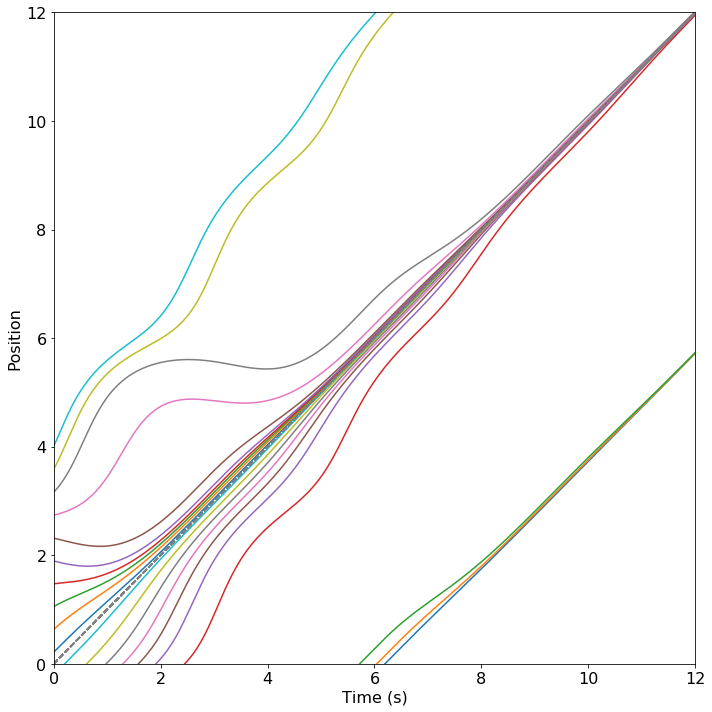

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

from disp import set_font_size


DT = .001
DX = .001

T = 12


def a(t):
    return np.cos(t)

def b(x):
    return -np.sin(x)

def c(x):
    return np.sin(x)*np.cos(x) + 1


t = np.arange(0, T, DT)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

for x_0 in np.linspace(-4, 4, 20):
    sys.stdout.write(f'x_0 = {x_0}...')
    x = np.nan * np.zeros(len(t))
    x[0] = x_0

    for ct, _t in enumerate(t[1:], 1):
        _x = x[ct-1]

        _v = a(_t)*b(_x) + c(_x)
        x[ct] = _x + _v*DT


    ax.plot(t, x)
    ax.plot([0, T], [0, T], c='gray', ls='--')

ax.set_xlim(0, T)
ax.set_ylim(0, T)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position')

set_font_size(ax, 16)

x_0 = 4.0...

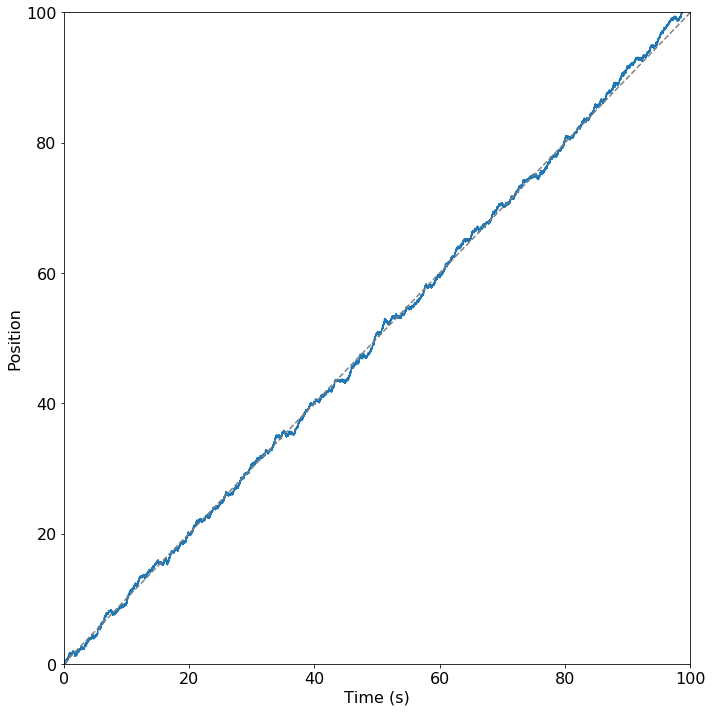

In [2]:
T = 100

t = np.arange(0, T, DT)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)

sys.stdout.write(f'x_0 = {x_0}...')
x = np.nan * np.zeros(len(t))
x[0] = 0

for ct, _t in enumerate(t[1:], 1):
    _x = x[ct-1]

    _v = a(_t)*b(_x) + c(_x) + np.random.normal(0, 20)
    x[ct] = _x + _v*DT


ax.plot(t, x)
ax.plot([0, T], [0, T], c='gray', ls='--')

ax.set_xlim(0, T)
ax.set_ylim(0, T)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position')

set_font_size(ax, 16)